In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

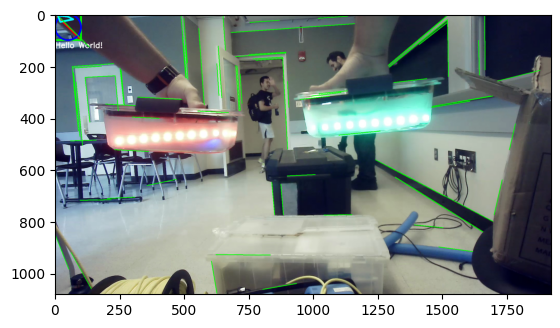

In [51]:
img = cv2.imread('image.jpg')
plt.imshow(img)

cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

#polygon
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)

cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


#Hough Transform

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                (np.pi)/180,
                100,
                minLineLength=100, #down goes more frequent, up goes less
                maxLineGap=10, #inverse relation
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

plt.imshow(img)


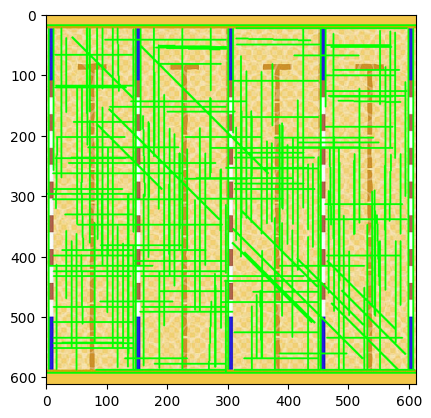

In [52]:
img = cv2.imread('pool.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                (np.pi)/180,
                100,
                minLineLength=100, #down goes more frequent, up goes less
                maxLineGap=10, #inverse relation
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

plt.imshow(img)

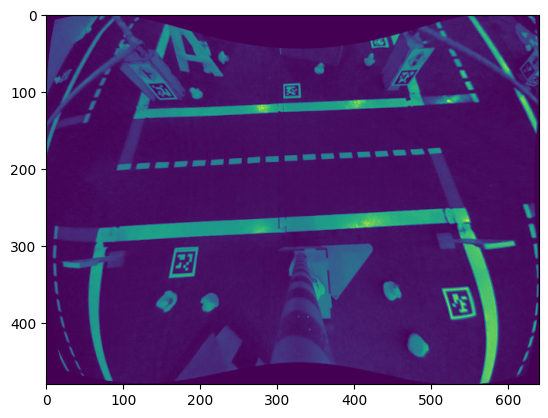

In [53]:
from dt_apriltags import Detector
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(img)